In [23]:
import pandas as pd

# Load the CSV file, specifying the relevant columns
df = pd.read_csv("total_capacity.csv", usecols=["Run number", "Datetime", "Technology", "Tech category", "Value"])

# Display the first few rows
df.head()

,Run number,Datetime,Technology,Tech category,Value
0,0,2020,Oil_supply,Supply,1.000000e+10
1,0,2021,Oil_supply,Supply,1.000000e+10
2,0,2022,Oil_supply,Supply,1.000000e+10
3,0,2023,Oil_supply,Supply,1.000000e+10
4,0,2024,Oil_supply,Supply,1.000000e+10


In [24]:
# Get unique technologies
unique_technologies = df["Technology"].unique().tolist()

# Display the list
print(unique_technologies)

['Oil_supply', 'NG_supply', 'SFF_supply', 'OP_supply', 'BW_supply', 'Bio_oil_supply', 'Geo_PP', 'Solar_PV_PP', 'Wind_PP', 'Hydro_PP', 'Pump_hydro_PP', 'Electricity_imports', 'Geo_HP', 'Pump_hydro_ST', 'Electrochemical_ST', 'Hydrogen_ST', 'SMR', 'SMR_CCS', 'Methane_pyrolysis', 'Electrolysis', 'SFF_PP', 'Oil_PP', 'NG_PP', 'NG_PP_CCS', 'SoSCO2_lr', 'SoSCO2_agg', 'Allam_PP', 'Bio_refinery', 'Oil_refinery', 'Biofuels_mix', 'NG_CHP_P', 'BW_CHP_P', 'Export_mix', 'Primary_mix', 'Transport_mix', 'Industrial_mix', 'Residential_mix', 'Services_mix', 'Elec_transmission_distribution']


In [25]:
# Define the list of technologies to keep
selected_technologies = ['NG_PP', 'NG_PP_CCS', 'Oil_PP','Solar_PV_PP', 'Wind_PP','Geo_PP', 'Hydro_PP',
                         'SMR', 'SMR_CCS', 'Electrolysis'
                         ]

# Filter the DataFrame for the year 2050 and the selected technologies
df_filtered = df[(df["Datetime"] == 2050) & (df["Technology"].isin(selected_technologies))]

# Display the first few rows of the filtered DataFrame
df_filtered.head()

,Run number,Datetime,Technology,Tech category,Value
216,0,2050,Geo_PP,Supply,0.000000
247,0,2050,Solar_PV_PP,Supply,44.224782
278,0,2050,Wind_PP,Supply,60.397751
309,0,2050,Hydro_PP,Supply,2.311215
526,0,2050,SMR,Conversion,1.251361


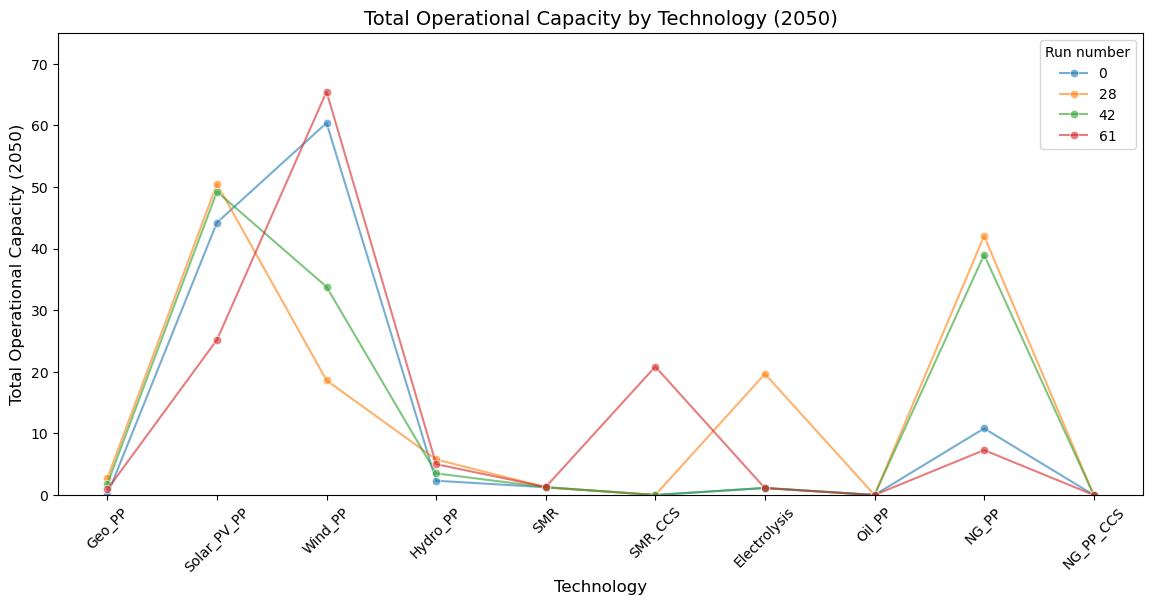

In [26]:
# Filter the DataFrame for 5 runs only
selected_runs = [0, 28, 42, 61]
df_filtered2 = df_filtered[(df_filtered["Run number"].isin(selected_runs))]

import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 6))

# Plot each run separately to connect its points
sns.lineplot(x="Technology", y="Value", hue="Run number", data=df_filtered2, marker="o", alpha=0.6, palette="tab10")

# Set labels and title
plt.xlabel("Technology", fontsize=12)
plt.ylabel("Total Operational Capacity (2050)", fontsize=12)
plt.title("Total Operational Capacity by Technology (2050)", fontsize=14)

# Set Y-axis limits
plt.ylim(0, 75)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Save the figure
plt.savefig("tot_cap_seleceted_runs.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

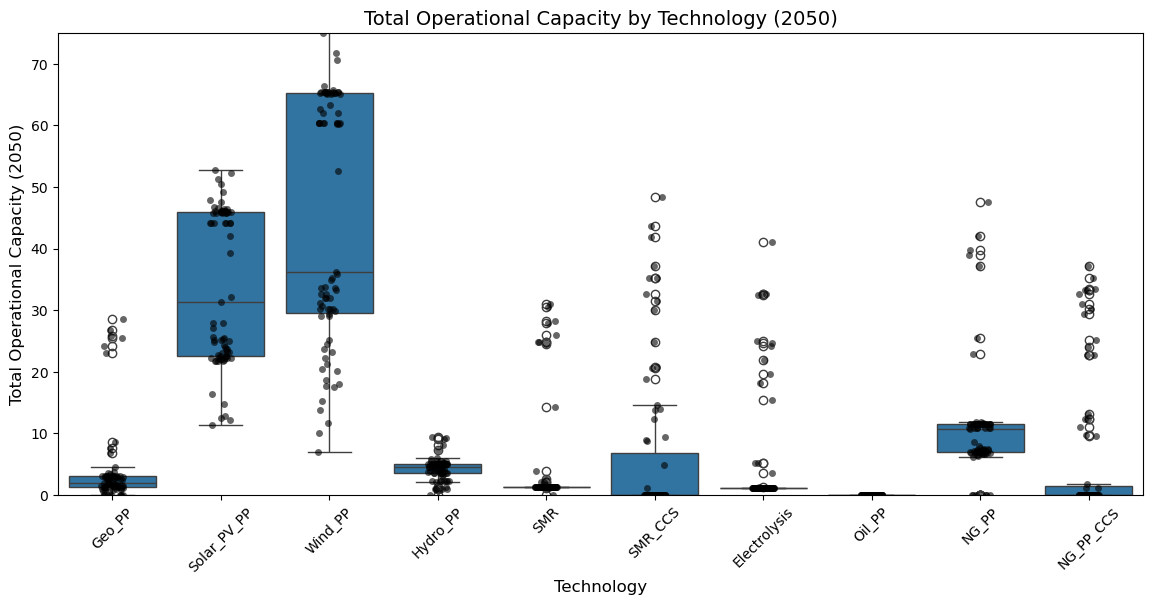

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 6))

# Create the boxplot
sns.boxplot(x="Technology", y="Value", data=df_filtered)

# Add scatter points to show individual run numbers
sns.stripplot(x="Technology", y="Value", data=df_filtered, jitter=True, color="black", alpha=0.6)

# Set labels and title
plt.xlabel("Technology", fontsize=12)
plt.ylabel("Total Operational Capacity (2050)", fontsize=12)
plt.title("Total Operational Capacity by Technology (2050)", fontsize=14)

# Set Y-axis limits
plt.ylim(0, 75)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Save the figure
plt.savefig("tot_cap.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

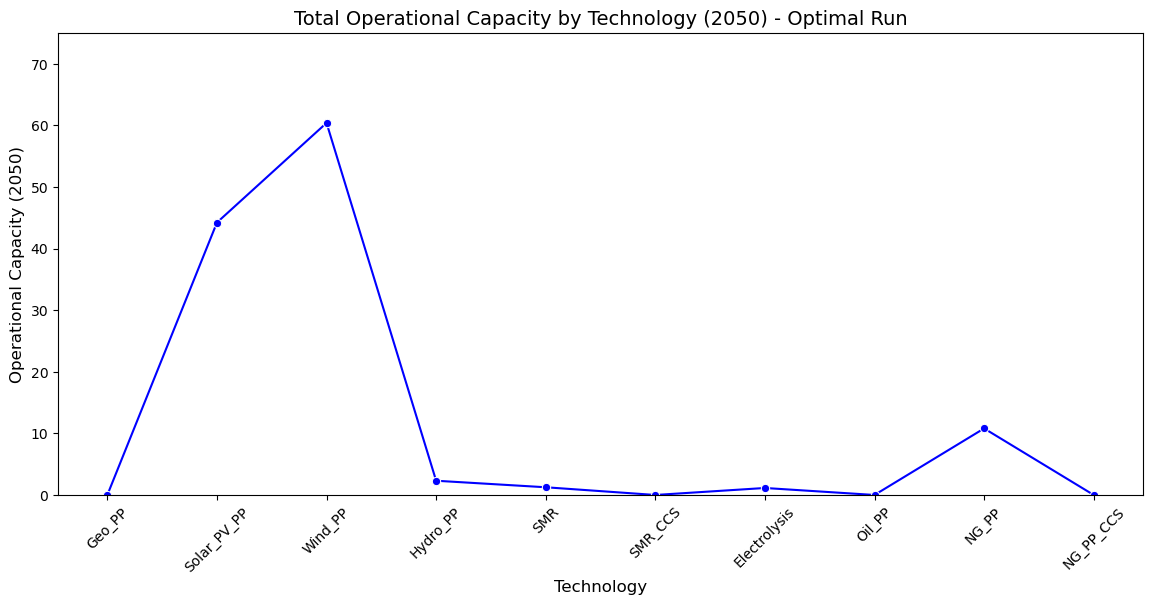

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataframe for Run 0
df_run0 = df_filtered[df_filtered["Run number"] == 0]

# Set the figure size
plt.figure(figsize=(14, 6))

# Create the scatter plot
sns.lineplot(x="Technology", y="Value", data=df_run0, marker="o", color="blue")

# Set labels and title
plt.xlabel("Technology", fontsize=12)
plt.ylabel("Operational Capacity (2050)", fontsize=12)
plt.title("Total Operational Capacity by Technology (2050) - Optimal Run", fontsize=14)

# Set Y-axis limits
plt.ylim(0, 75)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Save the figure
plt.savefig("tot_cap_opt.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

In [29]:
# Define the list of technologies to keep
selected_technologies = ['NG_PP', 'Oil_PP','Solar_PV_PP', 'Wind_PP','Geo_PP', 'Hydro_PP',
                         'SMR', 'Electrolysis'
                         ]

# Filter the DataFrame for the selected technologies
df_filtered2 = df_filtered[(df_filtered["Datetime"] == 2050) & (df_filtered["Technology"].isin(selected_technologies))]

# Filter for Run 0 and Run 43
df_selected_runs = df_filtered2[df_filtered2["Run number"].isin([0, 43])]

# Define colors for the runs
run_colors = {0: "blue", 43: "red"}  # Blue for Run 0, Red for Run 43

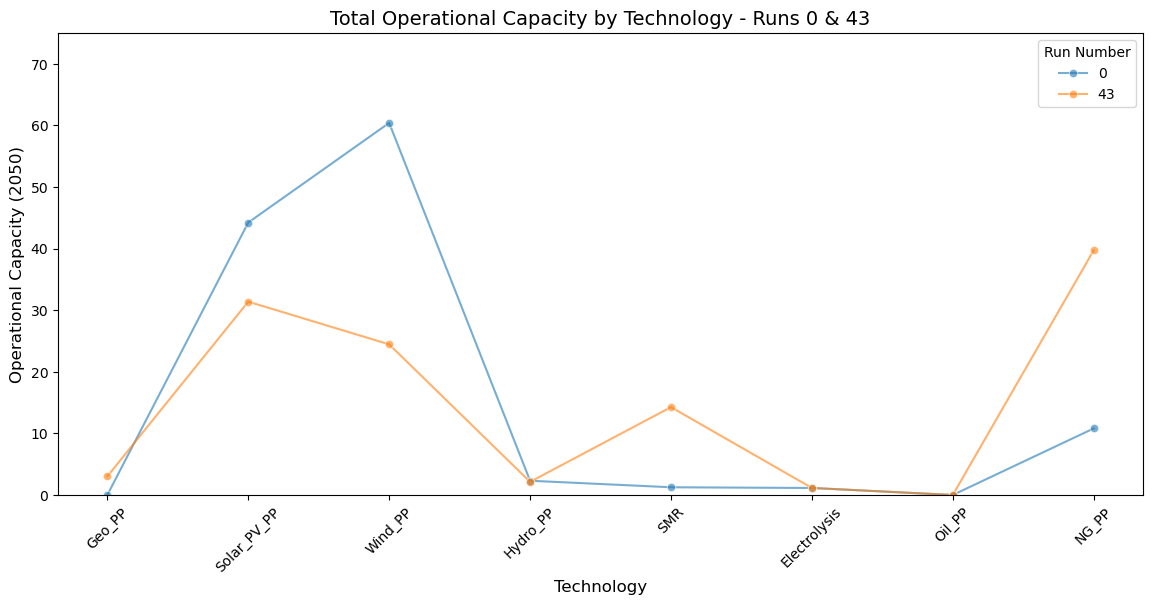

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(14, 6))

# Plot each run separately to connect its points
sns.lineplot(x="Technology", y="Value", hue="Run number", data=df_selected_runs, marker="o", alpha=0.6, palette="tab10")

# Set labels and title
plt.xlabel("Technology", fontsize=12)
plt.ylabel("Operational Capacity (2050)", fontsize=12)
plt.title("Total Operational Capacity by Technology - Runs 0 & 43", fontsize=14)

# Set Y-axis limits
plt.ylim(0, 75)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the legend with proper labels
plt.legend(title="Run Number", loc="upper right")

# Save the figure (optional)
plt.savefig("scatter_2050_operational_capacity_runs0_43.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

In [31]:
# Define the list of technologies to keep
selected_technologies = ['NG_PP', 'Oil_PP','Solar_PV_PP', 'Wind_PP','Geo_PP', 'Hydro_PP',
                         'SMR', 'Electrolysis'
                         ]

# Filter the DataFrame for the selected technologies
df_filtered2 = df_filtered[(df_filtered["Datetime"] == 2050) & (df_filtered["Technology"].isin(selected_technologies))]

# Filter for Run 0 and Run 74
df_selected_runs = df_filtered2[df_filtered2["Run number"].isin([0, 74])]

# Define colors for the runs
run_colors = {0: "blue", 74: "red"}  # Blue for Run 0, Red for Run 74

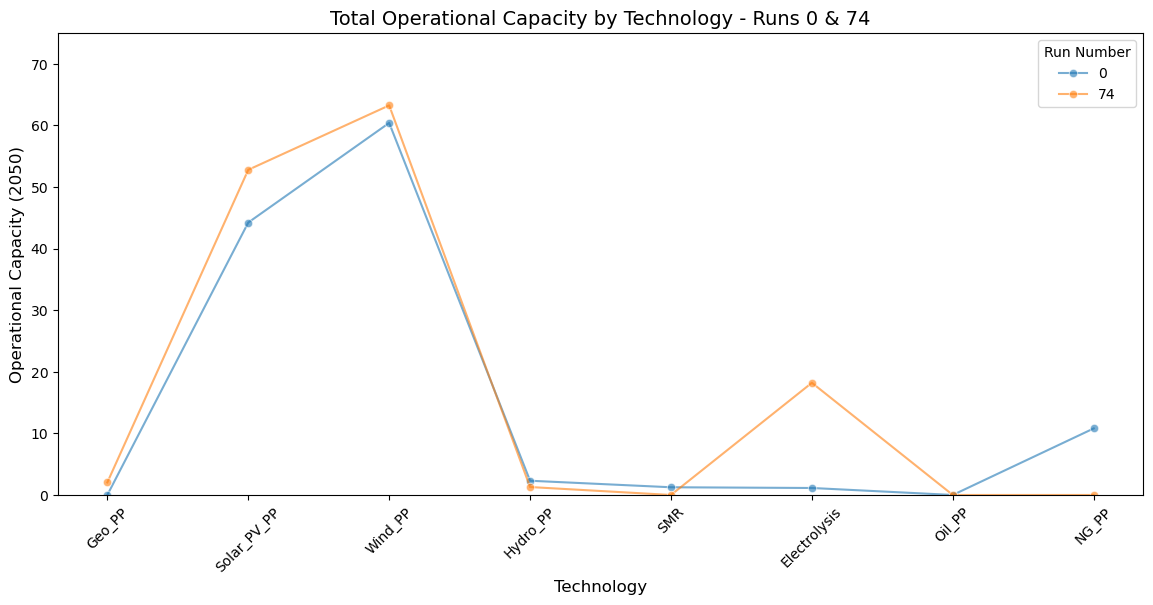

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(14, 6))

# Plot each run separately to connect its points
sns.lineplot(x="Technology", y="Value", hue="Run number", data=df_selected_runs, marker="o", alpha=0.6, palette="tab10")

# Set labels and title
plt.xlabel("Technology", fontsize=12)
plt.ylabel("Operational Capacity (2050)", fontsize=12)
plt.title("Total Operational Capacity by Technology - Runs 0 & 74", fontsize=14)

# Set Y-axis limits
plt.ylim(0, 75)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the legend with proper labels
plt.legend(title="Run Number", loc="upper right")

# Save the figure (optional)
plt.savefig("scatter_2050_operational_capacity_runs0_74.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

In [33]:
# Define the list of technologies to keep
selected_technologies = ['NG_PP', 'Oil_PP','Solar_PV_PP', 'Wind_PP','Geo_PP', 'Hydro_PP',
                         'SMR', 'Electrolysis'
                         ]

# Filter the DataFrame for the selected technologies
df_filtered2 = df_filtered[(df_filtered["Datetime"] == 2050) & (df_filtered["Technology"].isin(selected_technologies))]

# Filter for Run 0 and Run 59
df_selected_runs = df_filtered2[df_filtered2["Run number"].isin([0, 59])]

# Define colors for the runs
run_colors = {0: "blue", 59: "red"}  # Blue for Run 0, Red for Run 59

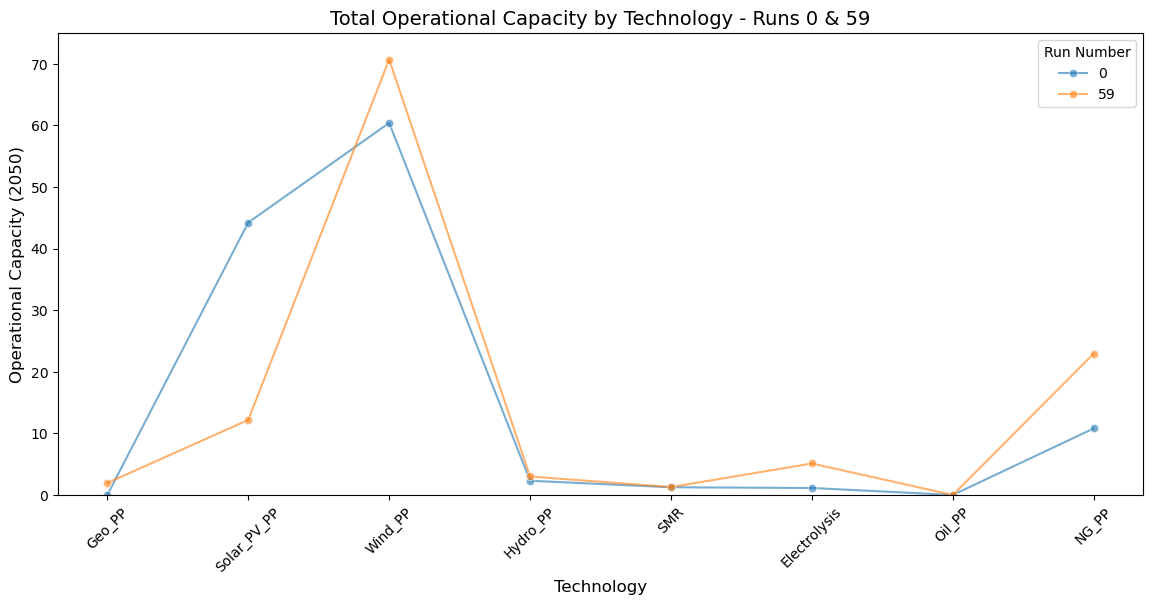

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(14, 6))

# Plot each run separately to connect its points
sns.lineplot(x="Technology", y="Value", hue="Run number", data=df_selected_runs, marker="o", alpha=0.6, palette="tab10")

# Set labels and title
plt.xlabel("Technology", fontsize=12)
plt.ylabel("Operational Capacity (2050)", fontsize=12)
plt.title("Total Operational Capacity by Technology - Runs 0 & 59", fontsize=14)

# Set Y-axis limits
plt.ylim(0, 75)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the legend with proper labels
plt.legend(title="Run Number", loc="upper right")

# Save the figure (optional)
plt.savefig("scatter_2050_operational_capacity_runs0_59.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

In [35]:
# Define the list of technologies to keep
selected_technologies = ['NG_PP', 'Oil_PP','Solar_PV_PP', 'Wind_PP','Geo_PP', 'Hydro_PP',
                         'SMR', 'Electrolysis'
                         ]

# Filter the DataFrame for the selected technologies
df_filtered2 = df_filtered[(df_filtered["Datetime"] == 2050) & (df_filtered["Technology"].isin(selected_technologies))]

# Filter for Run 0 and Run 7
df_selected_runs = df_filtered2[df_filtered2["Run number"].isin([0, 7])]

# Define colors for the runs
run_colors = {0: "blue", 7: "red"}  # Blue for Run 0, Red for Run 7

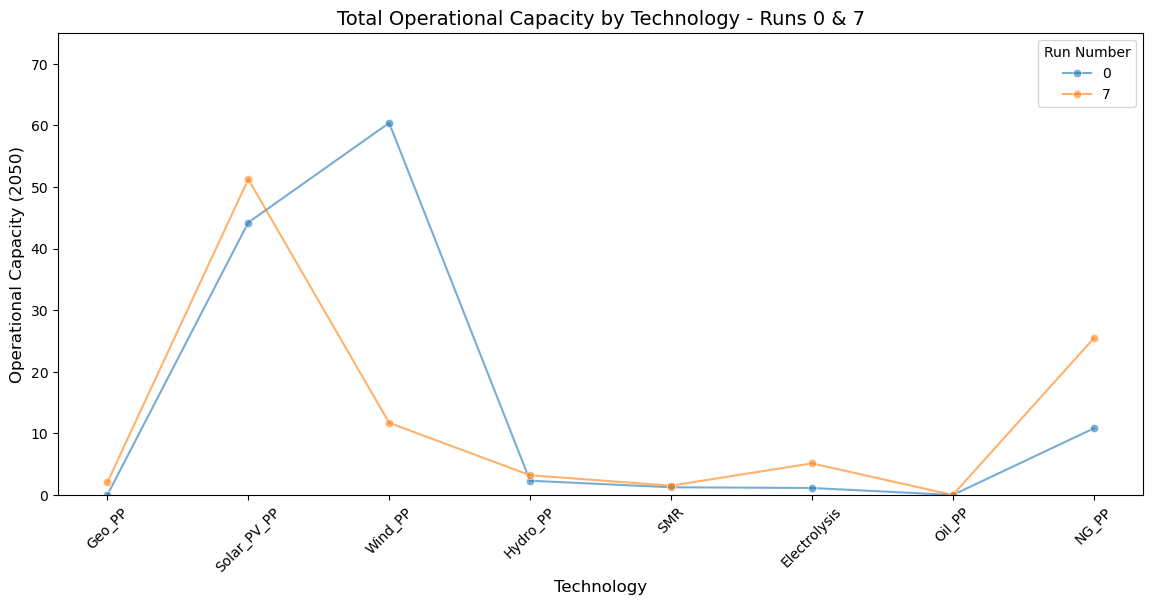

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(14, 6))

# Plot each run separately to connect its points
sns.lineplot(x="Technology", y="Value", hue="Run number", data=df_selected_runs, marker="o", alpha=0.6, palette="tab10")

# Set labels and title
plt.xlabel("Technology", fontsize=12)
plt.ylabel("Operational Capacity (2050)", fontsize=12)
plt.title("Total Operational Capacity by Technology - Runs 0 & 7", fontsize=14)

# Set Y-axis limits
plt.ylim(0, 75)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the legend with proper labels
plt.legend(title="Run Number", loc="upper right")

# Save the figure (optional)
plt.savefig("scatter_2050_operational_capacity_runs0_7.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()